In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC

In [3]:
def plot_decision_boundary(coef,intercept,mx,mn):
    w1,w2 = coef
    w0 = intercept
    x = np.array([mn,mx])
    y = -(w0 + x*w1)
    y/=w2
    plt.plot(x,y)
    
# detailed explanation of this equation of decision boundary can be found at
# https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary 

In [15]:
def visualize_boundary(X,y,svm):

# Create a meshgrid to visualize the decision boundary
    h = 0.02  # Step size in the meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    print(xx.shape)
    # Compute predicted class for each point on the meshgrid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    print("Before reshaping:",Z.shape)
    Z = Z.reshape(xx.shape)
    print("After reshaping:",Z.shape)

    # Plot the meshgrid points with different colors based on predicted class
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary of SVM')
    plt.show()


In [6]:
def plot_points(x,y):
    plt.scatter(x.values[:,0],x.values[:,1],c=y)

In [7]:
iris_dataset = load_iris()
df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
df["target"]=iris_dataset.target

In [8]:
df = df[df["target"]!=2]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


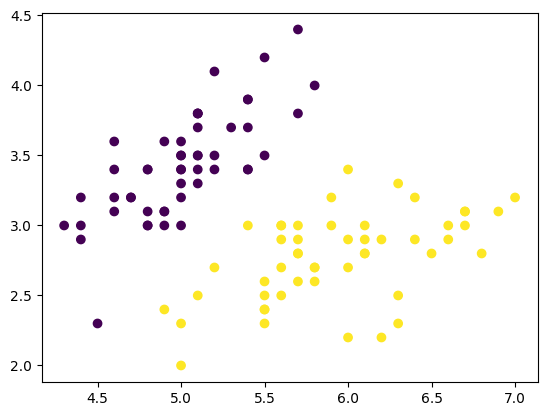

In [9]:
y = df["target"]
x = df[["sepal length (cm)","sepal width (cm)"]]


plt.scatter(x.values[:,0],x.values[:,1],c=y)

Accuracy 1.0


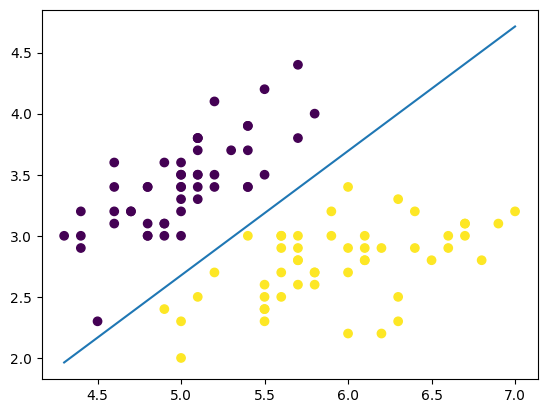

In [10]:
log_reg = LogisticRegression()
log_reg.fit(x,y)
accuracy = log_reg.score(x,y)
print("Accuracy",accuracy)

coef = log_reg.coef_
intercept = log_reg.intercept_


mx = max(x.values[:,0])
mn = min(x.values[:,0])

plot_decision_boundary(coef.flatten(),intercept,mx,mn)
plt.scatter(x.values[:,0],x.values[:,1],c=y)

accuracy 1.0


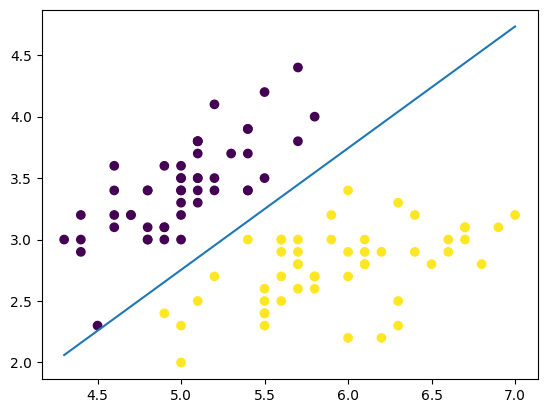

In [11]:
svc = SVC(kernel="linear")
svc.fit(x,y)
accuracy = svc.score(x,y)
print("accuracy",accuracy)
mx = max(x.values[:,0])
mn = min(x.values[:,0])

plot_decision_boundary(svc.coef_.flatten(),svc.intercept_,mx,mn)
plot_points(x,y)

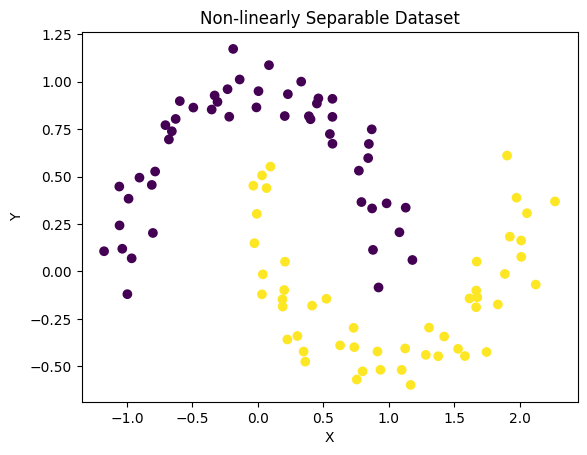

In [12]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate a non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linearly Separable Dataset')
plt.show()


Accuracy 0.87


Text(0, 0.5, 'Y')

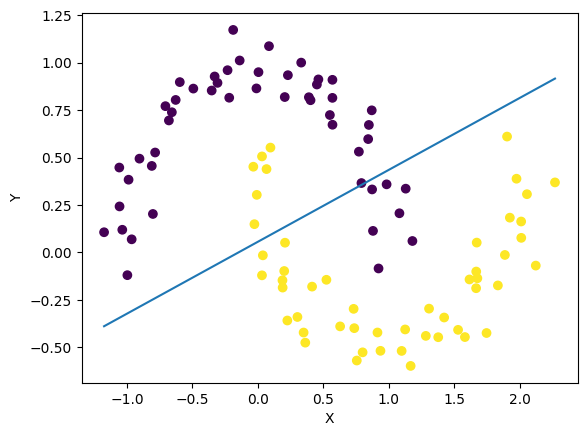

In [13]:
log_reg1 = LogisticRegression()
log_reg1.fit(X,y)
log_reg1.score(X,y)
print("Accuracy",log_reg1.score(X,y))
mx = max(X[:,0])
mn = min(X[:,0])

plot_decision_boundary(log_reg1.coef_.flatten(),log_reg1.intercept_,mx,mn)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')

Accuracy 1.0
(139, 223)
Before reshaping: (30997,)
After reshaping: (139, 223)


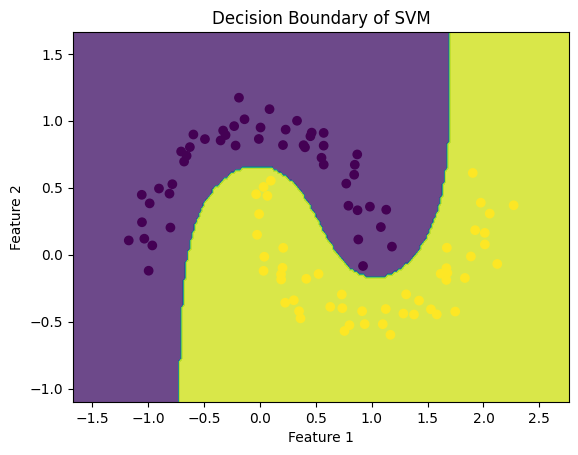

Text(0, 0.5, 'Y')

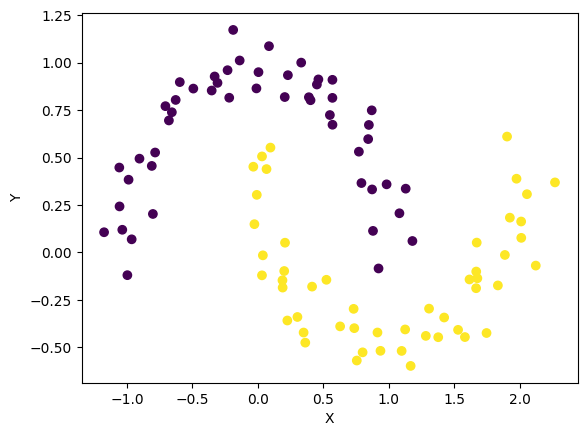

In [16]:
svc = SVC(kernel='rbf',C=5)
svc.fit(X,y)
svc.score(X,y)
print("Accuracy",svc.score(X,y))
mx = max(X[:,0])
mn = min(X[:,0])

# plot_decision_boundary(svc.coef_.flatten(),svc.intercept_,mx,mn)
visualize_boundary(X,y,svc)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')